<a href="https://colab.research.google.com/github/ankita111204/Keystroke-Dynamics---Based-Behavioral-Authentication-System/blob/main/keystroke3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Read and Clean Dataset

import pandas as pd


In [ ]:
# Load the dataset (upload your CSV first via Colab file uploader)
from google.colab import files
uploaded = files.upload()

Saving DSL-StrongPasswordData.csv to DSL-StrongPasswordData.csv


In [ ]:
# Load CSV
import io
df = pd.read_csv(io.BytesIO(uploaded['DSL-StrongPasswordData.csv']))

In [ ]:
# Display basic info
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (20400, 34)


,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

# Basic dataset info
print("\nColumns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())
print("\nUnique users:", df['subject'].nunique())
print("Users:", df['subject'].unique())





Columns:
 Index(['subject', 'sessionIndex', 'rep', 'H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return'],
      dtype='object')

Missing values:
 subject            0
sessionIndex       0
rep                0
H.period           0
DD.period.t        0
UD.period.t        0
H.t                0
DD.t.i             0
UD.t.i             0
H.i                0
DD.i.e             0
UD.i.e             0
H.e                0
DD.e.five          0
UD.e.five          0
H.five             0
DD.five.Shift.r    0
UD.five.Shift.r    0
H.Shift.r          0
DD.Shift.r.o       0
UD.Shift.r.o       0
H.o                0
DD.o.a             0
UD.o.a             0
H.a             

In [ ]:
# View column types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject          20400 non-null  object 
 1   sessionIndex     20400 non-null  int64  
 2   rep              20400 non-null  int64  
 3   H.period         20400 non-null  float64
 4   DD.period.t      20400 non-null  float64
 5   UD.period.t      20400 non-null  float64
 6   H.t              20400 non-null  float64
 7   DD.t.i           20400 non-null  float64
 8   UD.t.i           20400 non-null  float64
 9   H.i              20400 non-null  float64
 10  DD.i.e           20400 non-null  float64
 11  UD.i.e           20400 non-null  float64
 12  H.e              20400 non-null  float64
 13  DD.e.five        20400 non-null  float64
 14  UD.e.five        20400 non-null  float64
 15  H.five           20400 non-null  float64
 16  DD.five.Shift.r  20400 non-null  float64
 17  UD.five.Shif

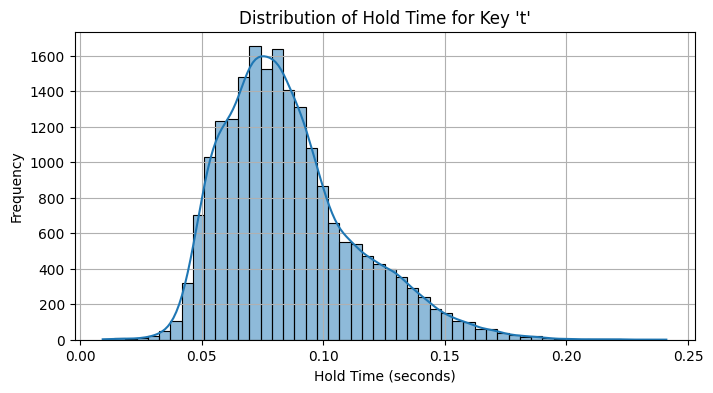

In [ ]:

# Plot distribution of one hold time feature
plt.figure(figsize=(8, 4))
sns.histplot(df['H.t'], bins=50, kde=True)
plt.title("Distribution of Hold Time for Key 't'")
plt.xlabel("Hold Time (seconds)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


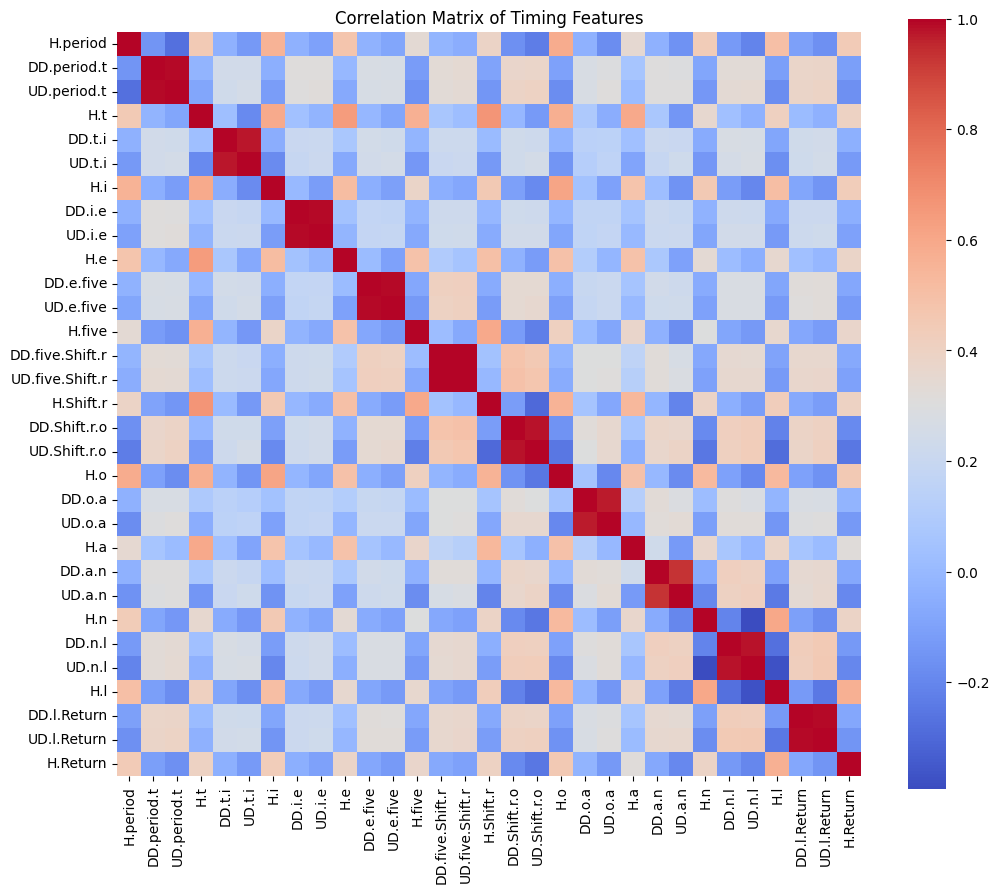

In [ ]:

# Correlation heatmap (only timing columns)
timing_cols = [col for col in df.columns if col.startswith(('H.', 'DD.', 'UD.'))]
plt.figure(figsize=(12, 10))
sns.heatmap(df[timing_cols].corr(), cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Timing Features")
plt.show()

In [ ]:
import numpy as np
# Step 1: Choose a target user (e.g., s002)
target_user = 's002'

In [ ]:
# Step 2: Extract all timing features
timing_features = [col for col in df.columns if col.startswith(('H.', 'DD.', 'UD.'))]

In [ ]:
# Step 3: Create feature matrix X and label vector y
genuine_df = df[df['subject'] == target_user][timing_features].copy()
genuine_df['label'] = 1
# Choose equal number of impostor samples randomly
impostor_df = df[df['subject'] != target_user][timing_features].sample(n=len(genuine_df), random_state=42).copy()
impostor_df['label'] = 0

# Combine and shuffle
full_df = pd.concat([genuine_df, impostor_df]).sample(frac=1, random_state=42).reset_index(drop=True)

# Separate X and y
X = full_df[timing_features].values
y = full_df['label'].values

print("X shape:", X.shape)
print("y distribution:", np.bincount(y))


X shape: (800, 31)
y distribution: [400 400]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on X and transform
X_scaled = scaler.fit_transform(X)

# Print shape and a preview
print("Shape after normalization:", X_scaled.shape)
print("First row (normalized):", X_scaled[0])


Shape after normalization: (800, 31)
First row (normalized): [ 0.76281668 -0.10105492 -0.2317275  -0.64188803 -0.62666298 -0.45049523
 -0.5331108  -0.56657069 -0.42366276 -1.06312721 -1.04831278 -0.92358806
 -0.21685472 -0.64768098 -0.62743493 -0.65263308 -0.4075622  -0.2804057
 -1.20703452 -0.6810933  -0.2583443  -0.32939472  0.16634723  0.31076781
  0.48719577 -0.61301282 -0.69479121 -1.01543833 -0.54063793 -0.39829792
 -0.87729481]


In [ ]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters
def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

# Forward and backward propagation
def propagate(weights, bias, X, y):
    m = X.shape[0]

    # Forward pass
    z = np.dot(X, weights) + bias
    A = sigmoid(z)

    # Cost function (Log loss)
    cost = -(1/m) * np.sum(y * np.log(A + 1e-8) + (1 - y) * np.log(1 - A + 1e-8))

    # Gradients
    dw = (1/m) * np.dot(X.T, (A - y))
    db = (1/m) * np.sum(A - y)

    return dw, db, cost

# Training function
def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    n_features = X.shape[1]
    weights, bias = initialize_weights(n_features)
    cost_history = []

    for i in range(epochs):
        dw, db, cost = propagate(weights, bias, X, y)

        # Update weights
        weights -= lr * dw
        bias -= lr * db

        if i % 100 == 0:
            cost_history.append(cost)
            print(f"Epoch {i}, Cost: {cost:.4f}")

    return weights, bias, cost_history

# Prediction
def predict(X, weights, bias, threshold=0.5):
    probs = sigmoid(np.dot(X, weights) + bias)
    return (probs >= threshold).astype(int)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train our model
weights, bias, cost_history = train_logistic_regression(X_train, y_train, lr=0.1, epochs=1000)


Epoch 0, Cost: 0.6931
Epoch 100, Cost: 0.3398
Epoch 200, Cost: 0.3086
Epoch 300, Cost: 0.2969
Epoch 400, Cost: 0.2910
Epoch 500, Cost: 0.2876
Epoch 600, Cost: 0.2855
Epoch 700, Cost: 0.2841
Epoch 800, Cost: 0.2832
Epoch 900, Cost: 0.2826


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on test data
y_pred = predict(X_test, weights, bias)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(acc * 100, 2), "%")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🔎 Confusion Matrix:\n", cm)

# Classification report (precision, recall, F1-score)
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Impostor", "Genuine"]))


✅ Accuracy: 87.08 %

🔎 Confusion Matrix:
 [[101  19]
 [ 12 108]]

📄 Classification Report:
               precision    recall  f1-score   support

    Impostor       0.89      0.84      0.87       120
     Genuine       0.85      0.90      0.87       120

    accuracy                           0.87       240
   macro avg       0.87      0.87      0.87       240
weighted avg       0.87      0.87      0.87       240



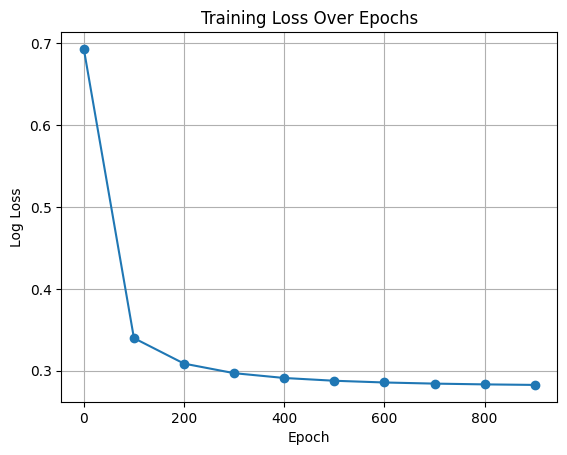

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(0, len(cost_history)*100, 100), cost_history, marker='o')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.grid(True)
plt.show()
